# REPRODUCIBLE RESEARCH PROJECT

June, 2024

**Team Members**

* Dominik Koterwa 454845
* Hüseyin Polat 437969
* Nurdan Beşli 457945
* Maciej Lorens 419763

## INTRODUCTION

Our project is centered on replicating and expanding upon the groundbreaking machine learning research detailed in the Asian Journal of Computer and Information Systems (AJCIS), specifically the article titled '**Utilisation of Machine Learning Techniques in Testing and Training of Different Medical Datasets**'. This initiative seeks to deepen our understanding of how machine learning can revolutionize the analysis of medical data, thereby enhancing disease detection and improving diagnostic accuracy across various health conditions.

By engaging with this research, we aim to assess the reproducibility of the results and explore potential enhancements in the methodology. Our study will utilize a similar approach to analyze medical datasets, focusing on maximizing the potential of machine learning in healthcare. Through rigorous testing and training, our objective is to contribute meaningful advancements to the medical field, offering insights that could be vital in developing more effective diagnostic tools and treatments.

## DATASETS

The study we replicated utilized machine learning algorithms to analyze six different healthcare datasets, all sourced from the **UC Irvine Machine Learning Repository**. Each of these datasets varies in the number of attributes and instances, as detailed below.

![RR_Dataset_Description](images/RR_Dataset_Description.PNG)

## METHODOLOGY

### DATA PREPROCESSING


For each dataset involved in our study, detailed data preprocessing steps are applied to ensure compatibility with machine learning models and to maintain the integrity of the data analysis. Below are the dataset-specific preprocessing methods implemented:

**COVID-19 Dataset**

* **Binary Remapping:** Each categorical variable representing binary states (e.g., positive '+' or negative '-') is replaced with numerical values where '+' is mapped to 1 and '-' is mapped to 0.
* **Numerical Conversion:** All columns are converted to numeric types to facilitate mathematical operations and model fitting.
* **Column Renaming:** To clearly indicate the binary nature of the data, columns are renamed by adding a 'is_' prefix, enhancing clarity and manageability in the dataset.

**Hepatitis Dataset**

* **Binary Remapping:** Specific columns that contain categorical data related to the patient's conditions (e.g., 'Steroid', 'Antivirals', 'Fatigue') are converted to binary format, where applicable values are adjusted to 0 and 1 to reflect absence and presence of the condition.
* **Mean and Median Imputation:** Missing values are addressed by calculating and substituting the mean and median for each column, allowing for robustness against outliers and skewed data.
* **Dropping Missing Data:** Rows containing missing data are removed to avoid the introduction of bias or inaccuracies in the model's predictions. Corresponding entries in the target variable are also excluded to maintain dataset alignment.

**Chronic Kidney Disease Dataset**

* **Binary Mapping:** Categorical descriptions (e.g., 'normal', 'abnormal'; 'present', 'notpresent') in symptoms and diagnostic results are mapped to binary (1, 0) to simplify the input for algorithm processing.
* **Mean and Median Imputation:** Implements both mean and median imputation for handling missing values, providing two sets of data for comparative analysis and model robustness.
* **Dropping Missing Data:** Ensures that only complete data entries are processed, by excluding rows with any missing values from the analysis, thus maintaining the reliability of the dataset.

**Breast Cancer Dataset**

* **Binary Mapping:** The target variable 'Diagnosis' is converted from its original categorical labels ('M' for malignant, 'B' for benign) into a binary format (1 for malignant, 0 for benign), aligning it with binary classification tasks in machine learning.
* **Data Checks and Cleaning:** Verifies data types, checks for outliers, and ensures that all entries are consistent and appropriate for analysis.

**Immunotherapy Dataset**

* **Binary Mapping and Renaming:** Converts 'sex' from a categorical to a binary format and updates the column name to 'is_female' to reflect this binary distinction.
* **One-Hot Encoding:** Applies one-hot encoding to the 'Type' column, which involves transforming it into multiple binary columns, each representing a different type of immunotherapy, thereby avoiding ordinal implications in the categorical data.
* **Concatenation:** The one-hot encoded columns are then concatenated back to the main dataset, preserving the original data structure while adding new binary indicators.

**Cryotherapy Dataset**

* **Binary Mapping:** Converts 'sex' to a binary format and adjusts column naming similarly to the Immunotherapy dataset to maintain consistency.
* **One-Hot Encoding:** The 'Type' column is treated with one-hot encoding to convert categorical treatment types into a series of binary columns, which are more suitable for machine learning models.
* **Concatenation of One-Hot Encoded Data:** These binary columns are merged back into the primary dataset, ensuring that all data remains integrated and accessible for subsequent analysis.

### MODELING AND HYPERPARAMETER OPTIMIZATION

In aligning with the methods of the replicated study, we employ the same machine learning models, each optimized through a systematic hyperparameter tuning process. The models and their respective hyperparameters are as follows:

* **Random Forest (RF):** Optimized for **n_estimators** (50, 100, 200), **criterion** ('gini', 'entropy'), **max_depth** (None, 10, 20), **min_samples_split** (2, 5, 10), **min_samples_leaf** (1, 2, 4), **max_features** ('sqrt', 'log2').

* **K-Nearest Neighbors (KNN)**: Optimized for **n_neighbors** (3, 5, 7), **weights** ('uniform', 'distance'), **algorithm** ('auto', 'ball_tree', 'kd_tree', 'brute'), **p** (1, 2).

* **Support Vector Machine (SVM):** Optimized for **C** (0.1, 1, 10), **kernel** ('poly', 'rbf'), **degree** (2, 3).

* **Decision Tree (DT):** Optimized for **criterion** ('gini', 'entropy'), **splitter** ('best', 'random'), **max_depth** (None, 10, 20), **min_samples_split** (2, 5, 10), **min_samples_leaf** (1, 2, 4), **max_features** ('sqrt', 'log2').

Hyperparameter tuning is conducted using **GridSearchCV**, which incorporates a **5-fold cross-validation** to ensure robustness and reliability in model performance. This meticulous optimization process ensures that each model is finely tuned to provide the best possible accuracy and generalizability on diverse medical datasets.

### PERFORMANCE METRICS

In alignment with the replicated study from the Asian Journal of Computer and Information Systems, we utilize the same performance metrics to evaluate the effectiveness of the machine learning algorithms implemented in our research. Each model was applied to the designated healthcare datasets, and their performance was quantitatively assessed using the following metrics:

* **Training Accuracy:** This metric indicates the proportion of correct predictions made by the model on the training dataset. It provides insight into how well the model learns from the data, mirroring the approach taken in the replicated study.

* **Testing Accuracy:** Reflects the proportion of correct predictions on the testing dataset, crucial for understanding how well the model generalizes to new, unseen data.

* **Training Time:** Measures the duration of time the model takes to learn from the training data, highlighting the computational efficiency of the model during the training phase.

* **Testing Time:** The time required by the model to make predictions on the testing dataset, indicative of the model's operational efficiency.

Additionally, to further enhance our evaluation framework, we have incorporated the measurement of the **Training and Testing F1 Score**, metrics not used in the replicated study. The F1 Score is a harmonic mean of precision and recall, providing a more nuanced view of model performance, particularly in the context of imbalanced datasets:

* **Training F1 Score:** This metric helps assess the balance between precision and recall during the model's training phase, offering deeper insights into the model’s predictive performance and accuracy.

* **Testing F1 Score:** Evaluates the model's precision and recall on the testing dataset, which is crucial for applications where the cost of false positives and false negatives is significant.

By utilizing these metrics, which were also employed in the original study, we ensure a consistent and comparative approach to evaluating model performance. 

## RESULTS

In [53]:
# Data uploading, preprocessing & visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('../Data/results.csv')

### Wisconsin Breast Cancer

**Training And Testing Time**

![Breast_Cancer_Time](images/Breast_Cancer_Time.PNG)

**Accuracy and F1 Score**

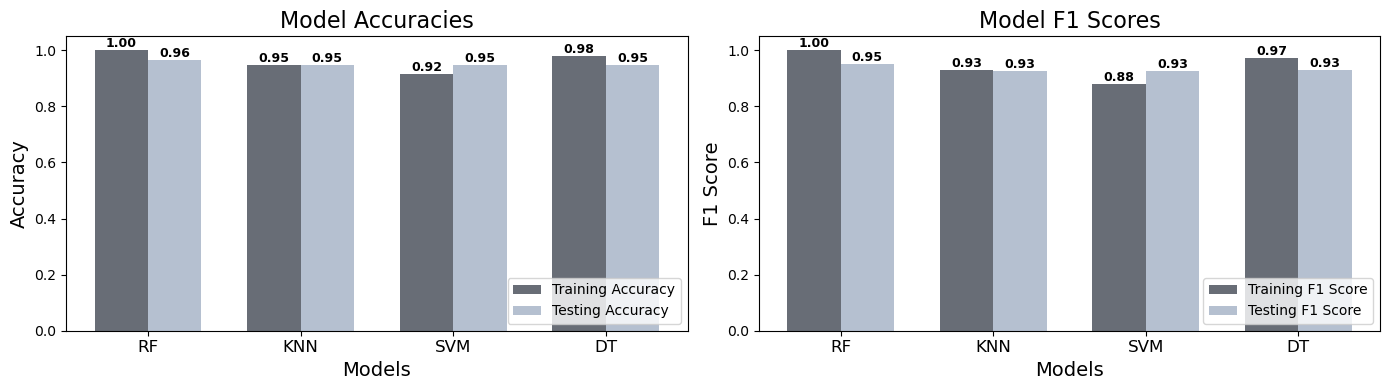

In [55]:
# Filtering the data for the chronic_kidney_disease_mean_imputted dataset
breast_cancer_data = data[data['dataset'] == 'breast_cancer']

# Creating the figure and axes for two histograms side by side again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Define the positions for the bars
x = np.arange(len(breast_cancer_data)) 
width = 0.35 

# Colors for the bars
colors = {'TRAIN': '#686D76', 'TEST': '#B5C0D0'}

# Plotting accuracies
ax1.bar(x, breast_cancer_data['train_acc'], width, label='Training Accuracy', color=colors['TRAIN'])
ax1.bar([p + width for p in x], breast_cancer_data['eval_acc'], width, label='Testing Accuracy', color=colors['TEST'])

# Adding labels above bars for accuracies
for i, v in enumerate(breast_cancer_data['train_acc']):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(breast_cancer_data['eval_acc']):
    ax1.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Plotting F1 scores
ax2.bar(x, breast_cancer_data['train_f1'], width, label='Training F1 Score', color=colors['TRAIN'])
ax2.bar([p + width for p in x], breast_cancer_data['eval_f1'], width, label='Testing F1 Score', color=colors['TEST'])

# Adding labels above bars for F1 scores
for i, v in enumerate(breast_cancer_data['train_f1']):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(breast_cancer_data['eval_f1']):
    ax2.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Styling and labeling
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Model Accuracies', fontsize=16)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(breast_cancer_data['model'].str.upper(), fontsize=12) 
ax1.legend(loc='lower right')
ax1.set_ylim(0.0, 1.05)

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_title('Model F1 Scores', fontsize=16)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(breast_cancer_data['model'].str.upper(), fontsize=12)  
ax2.legend(loc='lower right')
ax2.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.show()

### Chronic Kidney Disease

**Training And Testing Time**

![Chronic_Kidney_Disease_Time](images/Chronic_Kidney_Disease_Time.PNG)

**Accuracy and F1 Score**

##### Mean Imputted

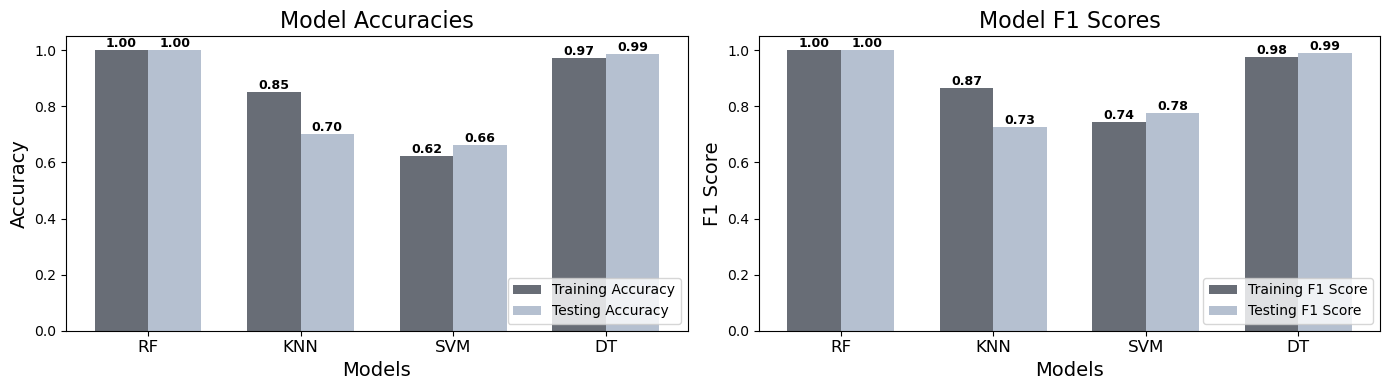

In [56]:
# Filtering the data for the chronic_kidney_disease_mean_imputted dataset
ckd_mean_imputted_data = data[data['dataset'] == 'chronic_kidney_disease_mean_imputted']

# Creating the figure and axes for two histograms side by side again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Define the positions for the bars
x = np.arange(len(ckd_mean_imputted_data)) 
width = 0.35 

# Colors for the bars
colors = {'TRAIN': '#686D76', 'TEST': '#B5C0D0'}

# Plotting accuracies
ax1.bar(x, ckd_mean_imputted_data['train_acc'], width, label='Training Accuracy', color=colors['TRAIN'])
ax1.bar([p + width for p in x], ckd_mean_imputted_data['eval_acc'], width, label='Testing Accuracy', color=colors['TEST'])

# Adding labels above bars for accuracies
for i, v in enumerate(ckd_mean_imputted_data['train_acc']):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(ckd_mean_imputted_data['eval_acc']):
    ax1.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Plotting F1 scores
ax2.bar(x, ckd_mean_imputted_data['train_f1'], width, label='Training F1 Score', color=colors['TRAIN'])
ax2.bar([p + width for p in x], ckd_mean_imputted_data['eval_f1'], width, label='Testing F1 Score', color=colors['TEST'])

# Adding labels above bars for F1 scores
for i, v in enumerate(ckd_mean_imputted_data['train_f1']):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(ckd_mean_imputted_data['eval_f1']):
    ax2.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Styling and labeling
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Model Accuracies', fontsize=16)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(ckd_mean_imputted_data['model'].str.upper(), fontsize=12) 
ax1.legend(loc='lower right')
ax1.set_ylim(0.0, 1.05)

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_title('Model F1 Scores', fontsize=16)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(ckd_mean_imputted_data['model'].str.upper(), fontsize=12)  
ax2.legend(loc='lower right')
ax2.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.show()

##### Median Imputted

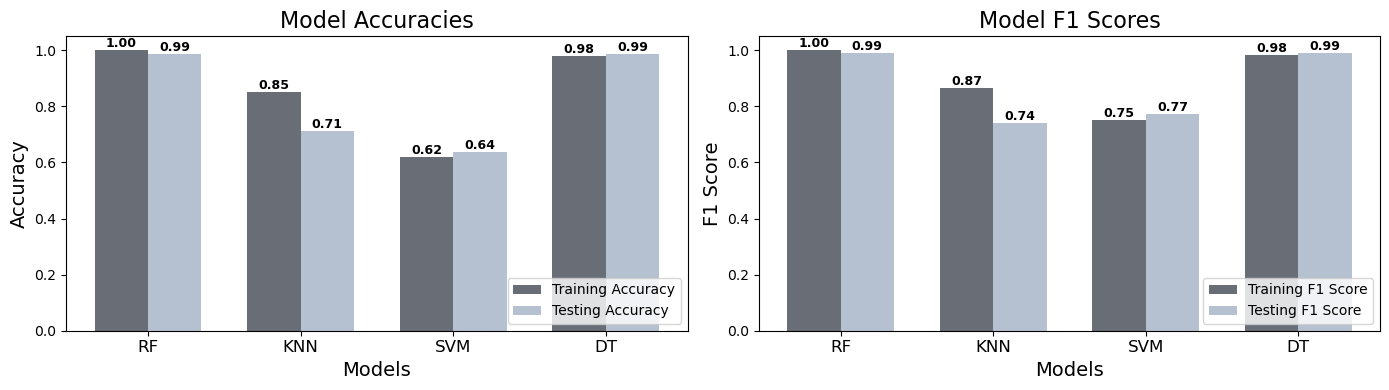

In [57]:
# Filtering the data for the chronic_kidney_disease_median_imputted dataset
ckd_median_imputted_data = data[data['dataset'] == 'chronic_kidney_disease_median_imputted']

# Creating the figure and axes for two histograms side by side again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Define the positions for the bars
x = np.arange(len(ckd_median_imputted_data)) 
width = 0.35 

# Colors for the bars
colors = {'TRAIN': '#686D76', 'TEST': '#B5C0D0'}

# Plotting accuracies
ax1.bar(x, ckd_median_imputted_data['train_acc'], width, label='Training Accuracy', color=colors['TRAIN'])
ax1.bar([p + width for p in x], ckd_median_imputted_data['eval_acc'], width, label='Testing Accuracy', color=colors['TEST'])

# Adding labels above bars for accuracies
for i, v in enumerate(ckd_median_imputted_data['train_acc']):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(ckd_median_imputted_data['eval_acc']):
    ax1.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Plotting F1 scores
ax2.bar(x, ckd_median_imputted_data['train_f1'], width, label='Training F1 Score', color=colors['TRAIN'])
ax2.bar([p + width for p in x], ckd_median_imputted_data['eval_f1'], width, label='Testing F1 Score', color=colors['TEST'])

# Adding labels above bars for F1 scores
for i, v in enumerate(ckd_median_imputted_data['train_f1']):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(ckd_median_imputted_data['eval_f1']):
    ax2.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Styling and labeling
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Model Accuracies', fontsize=16)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(ckd_median_imputted_data['model'].str.upper(), fontsize=12) 
ax1.legend(loc='lower right')
ax1.set_ylim(0.0, 1.05)

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_title('Model F1 Scores', fontsize=16)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(ckd_median_imputted_data['model'].str.upper(), fontsize=12)  
ax2.legend(loc='lower right')
ax2.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.show()

##### Missing Dropped

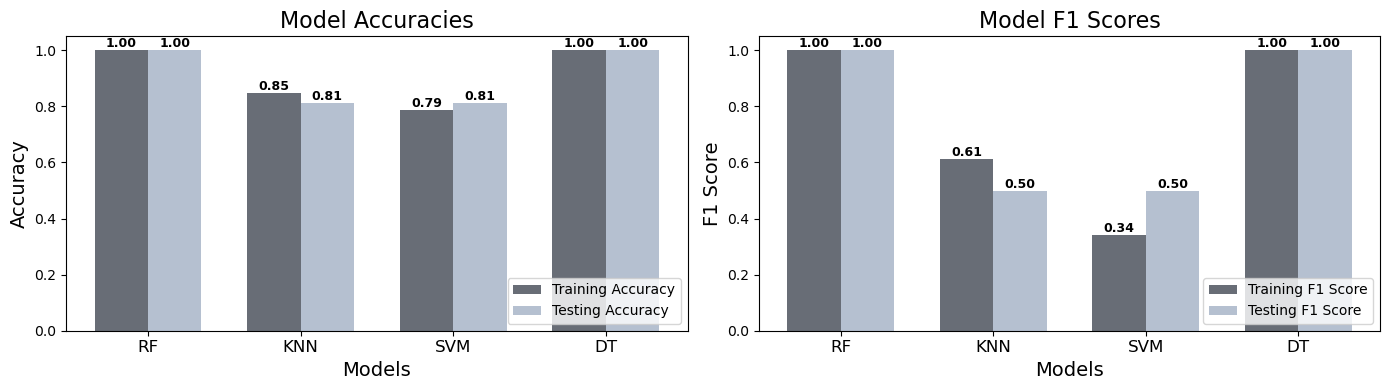

In [58]:
# Filtering the data for the chronic_kidney_disease_missing_dropped dataset
ckd_missing_dropped_data = data[data['dataset'] == 'chronic_kidney_disease_missing_dropped']

# Creating the figure and axes for two histograms side by side again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Define the positions for the bars
x = np.arange(len(ckd_missing_dropped_data)) 
width = 0.35 

# Colors for the bars
colors = {'TRAIN': '#686D76', 'TEST': '#B5C0D0'}

# Plotting accuracies
ax1.bar(x, ckd_missing_dropped_data['train_acc'], width, label='Training Accuracy', color=colors['TRAIN'])
ax1.bar([p + width for p in x], ckd_missing_dropped_data['eval_acc'], width, label='Testing Accuracy', color=colors['TEST'])

# Adding labels above bars for accuracies
for i, v in enumerate(ckd_missing_dropped_data['train_acc']):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(ckd_missing_dropped_data['eval_acc']):
    ax1.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Plotting F1 scores
ax2.bar(x, ckd_missing_dropped_data['train_f1'], width, label='Training F1 Score', color=colors['TRAIN'])
ax2.bar([p + width for p in x], ckd_missing_dropped_data['eval_f1'], width, label='Testing F1 Score', color=colors['TEST'])

# Adding labels above bars for F1 scores
for i, v in enumerate(ckd_missing_dropped_data['train_f1']):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(ckd_missing_dropped_data['eval_f1']):
    ax2.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Styling and labeling
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Model Accuracies', fontsize=16)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(ckd_missing_dropped_data['model'].str.upper(), fontsize=12) 
ax1.legend(loc='lower right')
ax1.set_ylim(0.0, 1.05)

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_title('Model F1 Scores', fontsize=16)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(ckd_missing_dropped_data['model'].str.upper(), fontsize=12)  
ax2.legend(loc='lower right')
ax2.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.show()

### Covid 19

**Training And Testing Time**

![Covid19_Time](images/Covid19_Time.PNG)

**Accuracy and F1 Score**

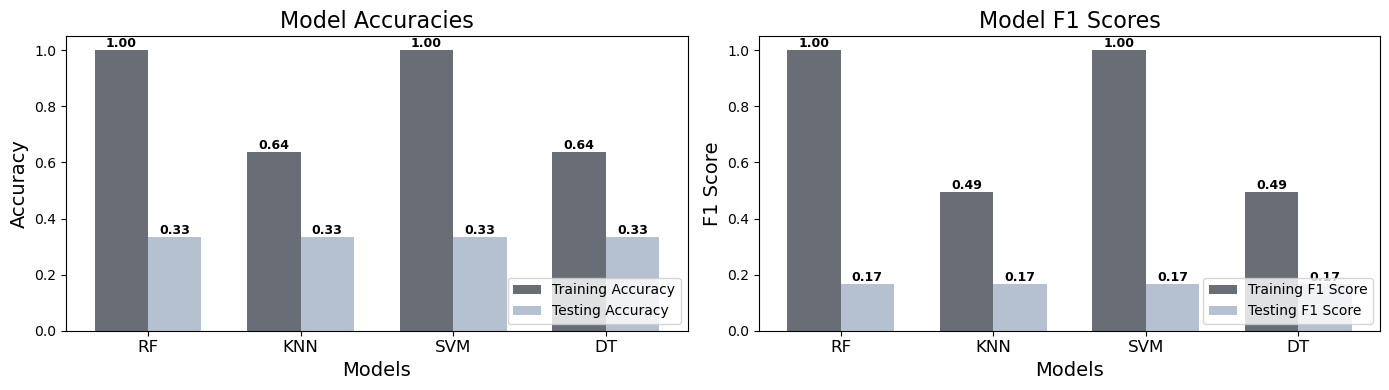

In [59]:
# Filtering the data for the covid_19 dataset
covid_19_data = data[data['dataset'] == 'covid_19']

# Creating the figure and axes for two histograms side by side again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Define the positions for the bars
x = np.arange(len(covid_19_data)) 
width = 0.35 

# Colors for the bars
colors = {'TRAIN': '#686D76', 'TEST': '#B5C0D0'}

# Plotting accuracies
ax1.bar(x, covid_19_data['train_acc'], width, label='Training Accuracy', color=colors['TRAIN'])
ax1.bar([p + width for p in x], covid_19_data['eval_acc'], width, label='Testing Accuracy', color=colors['TEST'])

# Adding labels above bars for accuracies
for i, v in enumerate(covid_19_data['train_acc']):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(covid_19_data['eval_acc']):
    ax1.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Plotting F1 scores
ax2.bar(x, covid_19_data['train_f1'], width, label='Training F1 Score', color=colors['TRAIN'])
ax2.bar([p + width for p in x], covid_19_data['eval_f1'], width, label='Testing F1 Score', color=colors['TEST'])

# Adding labels above bars for F1 scores
for i, v in enumerate(covid_19_data['train_f1']):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(covid_19_data['eval_f1']):
    ax2.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Styling and labeling
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Model Accuracies', fontsize=16)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(covid_19_data['model'].str.upper(), fontsize=12) 
ax1.legend(loc='lower right')
ax1.set_ylim(0.0, 1.05)

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_title('Model F1 Scores', fontsize=16)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(covid_19_data['model'].str.upper(), fontsize=12)  
ax2.legend(loc='lower right')
ax2.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.show()

### Cryotherapy

**Training And Testing Time**

![Cryotherapy_Time](images/Cryotherapy_Time.PNG)

**Accuracy and F1 Score**

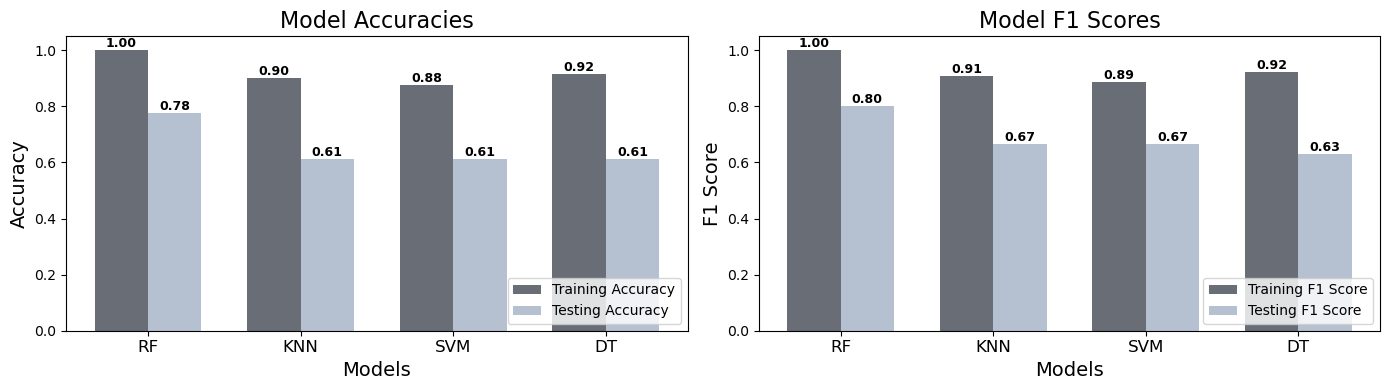

In [60]:
# Filtering the data for the cryotherapy dataset
cryotherapy_data = data[data['dataset'] == 'cryotherapy']

# Creating the figure and axes for two histograms side by side again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Define the positions for the bars
x = np.arange(len(cryotherapy_data)) 
width = 0.35 

# Colors for the bars
colors = {'TRAIN': '#686D76', 'TEST': '#B5C0D0'}

# Plotting accuracies
ax1.bar(x, cryotherapy_data['train_acc'], width, label='Training Accuracy', color=colors['TRAIN'])
ax1.bar([p + width for p in x], cryotherapy_data['eval_acc'], width, label='Testing Accuracy', color=colors['TEST'])

# Adding labels above bars for accuracies
for i, v in enumerate(cryotherapy_data['train_acc']):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(cryotherapy_data['eval_acc']):
    ax1.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Plotting F1 scores
ax2.bar(x, cryotherapy_data['train_f1'], width, label='Training F1 Score', color=colors['TRAIN'])
ax2.bar([p + width for p in x], cryotherapy_data['eval_f1'], width, label='Testing F1 Score', color=colors['TEST'])

# Adding labels above bars for F1 scores
for i, v in enumerate(cryotherapy_data['train_f1']):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(cryotherapy_data['eval_f1']):
    ax2.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Styling and labeling
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Model Accuracies', fontsize=16)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(cryotherapy_data['model'].str.upper(), fontsize=12) 
ax1.legend(loc='lower right')
ax1.set_ylim(0.0, 1.05)

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_title('Model F1 Scores', fontsize=16)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(cryotherapy_data['model'].str.upper(), fontsize=12)  
ax2.legend(loc='lower right')
ax2.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.show()

### Hepatitis

**Training And Testing Time**

![Hepathisis_time](images/Hepathisis_time.PNG)

**Accuracy and F1 Score**

##### Mean Imputted

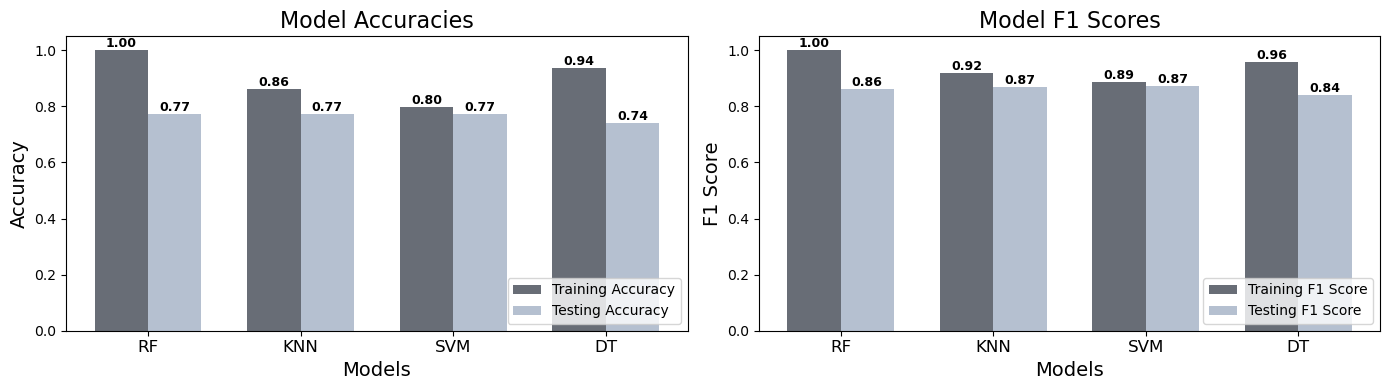

In [61]:
# Filtering the data for the hepatitis_mean_imputted dataset
hepatitis_mean_imputted_data = data[data['dataset'] == 'hepatitis_mean_imputted']

# Creating the figure and axes for two histograms side by side again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Define the positions for the bars
x = np.arange(len(hepatitis_mean_imputted_data)) 
width = 0.35 

# Colors for the bars
colors = {'TRAIN': '#686D76', 'TEST': '#B5C0D0'}

# Plotting accuracies
ax1.bar(x, hepatitis_mean_imputted_data['train_acc'], width, label='Training Accuracy', color=colors['TRAIN'])
ax1.bar([p + width for p in x], hepatitis_mean_imputted_data['eval_acc'], width, label='Testing Accuracy', color=colors['TEST'])

# Adding labels above bars for accuracies
for i, v in enumerate(hepatitis_mean_imputted_data['train_acc']):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(hepatitis_mean_imputted_data['eval_acc']):
    ax1.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Plotting F1 scores
ax2.bar(x, hepatitis_mean_imputted_data['train_f1'], width, label='Training F1 Score', color=colors['TRAIN'])
ax2.bar([p + width for p in x], hepatitis_mean_imputted_data['eval_f1'], width, label='Testing F1 Score', color=colors['TEST'])

# Adding labels above bars for F1 scores
for i, v in enumerate(hepatitis_mean_imputted_data['train_f1']):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(hepatitis_mean_imputted_data['eval_f1']):
    ax2.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Styling and labeling
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Model Accuracies', fontsize=16)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(hepatitis_mean_imputted_data['model'].str.upper(), fontsize=12) 
ax1.legend(loc='lower right')
ax1.set_ylim(0.0, 1.05)

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_title('Model F1 Scores', fontsize=16)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(hepatitis_mean_imputted_data['model'].str.upper(), fontsize=12)  
ax2.legend(loc='lower right')
ax2.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.show()

##### Median Imputted

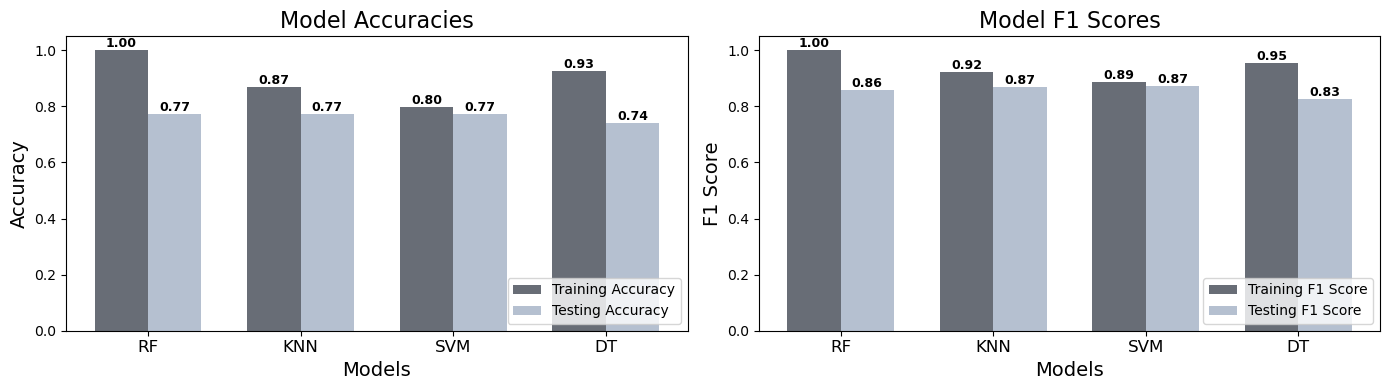

In [62]:
# Filtering the data for the hepatitis_median_imputted dataset
hepatitis_median_imputted_data = data[data['dataset'] == 'hepatitis_median_imputted']

# Creating the figure and axes for two histograms side by side again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Define the positions for the bars
x = np.arange(len(hepatitis_median_imputted_data)) 
width = 0.35 

# Colors for the bars
colors = {'TRAIN': '#686D76', 'TEST': '#B5C0D0'}

# Plotting accuracies
ax1.bar(x, hepatitis_median_imputted_data['train_acc'], width, label='Training Accuracy', color=colors['TRAIN'])
ax1.bar([p + width for p in x], hepatitis_median_imputted_data['eval_acc'], width, label='Testing Accuracy', color=colors['TEST'])

# Adding labels above bars for accuracies
for i, v in enumerate(hepatitis_median_imputted_data['train_acc']):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(hepatitis_median_imputted_data['eval_acc']):
    ax1.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Plotting F1 scores
ax2.bar(x, hepatitis_median_imputted_data['train_f1'], width, label='Training F1 Score', color=colors['TRAIN'])
ax2.bar([p + width for p in x], hepatitis_median_imputted_data['eval_f1'], width, label='Testing F1 Score', color=colors['TEST'])

# Adding labels above bars for F1 scores
for i, v in enumerate(hepatitis_median_imputted_data['train_f1']):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(hepatitis_median_imputted_data['eval_f1']):
    ax2.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Styling and labeling
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Model Accuracies', fontsize=16)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(hepatitis_median_imputted_data['model'].str.upper(), fontsize=12) 
ax1.legend(loc='lower right')
ax1.set_ylim(0.0, 1.05)

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_title('Model F1 Scores', fontsize=16)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(hepatitis_median_imputted_data['model'].str.upper(), fontsize=12)  
ax2.legend(loc='lower right')
ax2.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.show()

##### Missing Dropped

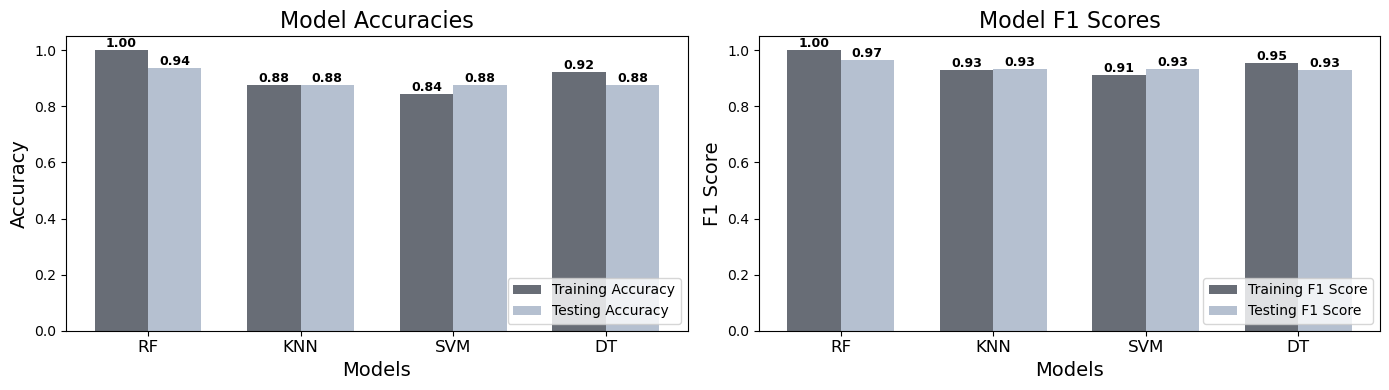

In [63]:
# Filtering the data for the hepatitis_missing_dropped dataset
hepatitis_missing_dropped_data = data[data['dataset'] == 'hepatitis_missing_dropped']

# Creating the figure and axes for two histograms side by side again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Define the positions for the bars
x = np.arange(len(hepatitis_missing_dropped_data)) 
width = 0.35 

# Colors for the bars
colors = {'TRAIN': '#686D76', 'TEST': '#B5C0D0'}

# Plotting accuracies
ax1.bar(x, hepatitis_missing_dropped_data['train_acc'], width, label='Training Accuracy', color=colors['TRAIN'])
ax1.bar([p + width for p in x], hepatitis_missing_dropped_data['eval_acc'], width, label='Testing Accuracy', color=colors['TEST'])

# Adding labels above bars for accuracies
for i, v in enumerate(hepatitis_missing_dropped_data['train_acc']):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(hepatitis_missing_dropped_data['eval_acc']):
    ax1.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Plotting F1 scores
ax2.bar(x, hepatitis_missing_dropped_data['train_f1'], width, label='Training F1 Score', color=colors['TRAIN'])
ax2.bar([p + width for p in x], hepatitis_missing_dropped_data['eval_f1'], width, label='Testing F1 Score', color=colors['TEST'])

# Adding labels above bars for F1 scores
for i, v in enumerate(hepatitis_missing_dropped_data['train_f1']):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(hepatitis_missing_dropped_data['eval_f1']):
    ax2.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Styling and labeling
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Model Accuracies', fontsize=16)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(hepatitis_missing_dropped_data['model'].str.upper(), fontsize=12) 
ax1.legend(loc='lower right')
ax1.set_ylim(0.0, 1.05)

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_title('Model F1 Scores', fontsize=16)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(hepatitis_missing_dropped_data['model'].str.upper(), fontsize=12)  
ax2.legend(loc='lower right')
ax2.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.show()

### Immunotherapy

**Training And Testing Time**

![Immunotherapy_time](images/Immunotherapy_time.PNG)

**Accuracy and F1 Score**

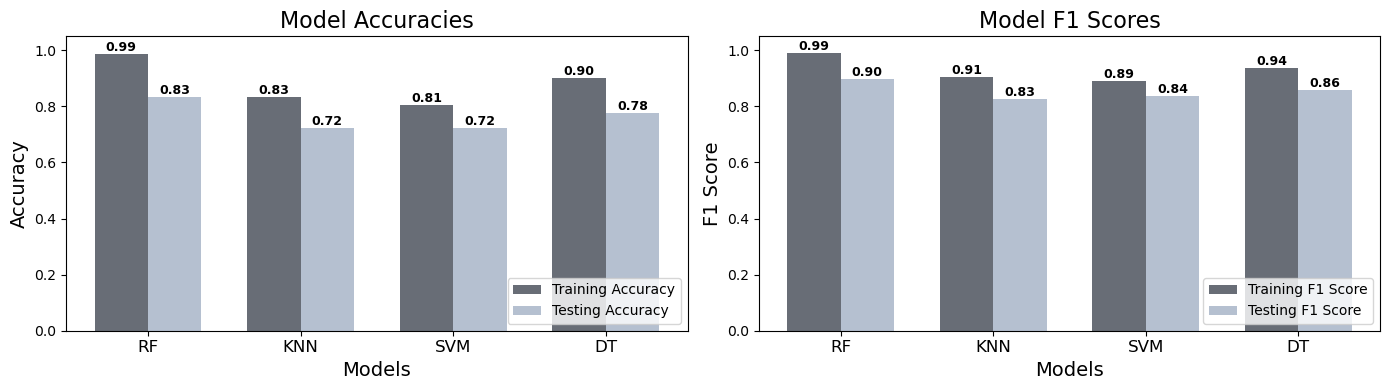

In [64]:
# Filtering the data for the immunotherapy dataset
immunotherapy_data = data[data['dataset'] == 'immunotherapy']

# Creating the figure and axes for two histograms side by side again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Define the positions for the bars
x = np.arange(len(immunotherapy_data)) 
width = 0.35 

# Colors for the bars
colors = {'TRAIN': '#686D76', 'TEST': '#B5C0D0'}

# Plotting accuracies
ax1.bar(x, immunotherapy_data['train_acc'], width, label='Training Accuracy', color=colors['TRAIN'])
ax1.bar([p + width for p in x], immunotherapy_data['eval_acc'], width, label='Testing Accuracy', color=colors['TEST'])

# Adding labels above bars for accuracies
for i, v in enumerate(immunotherapy_data['train_acc']):
    ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(immunotherapy_data['eval_acc']):
    ax1.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Plotting F1 scores
ax2.bar(x, immunotherapy_data['train_f1'], width, label='Training F1 Score', color=colors['TRAIN'])
ax2.bar([p + width for p in x], immunotherapy_data['eval_f1'], width, label='Testing F1 Score', color=colors['TEST'])

# Adding labels above bars for F1 scores
for i, v in enumerate(immunotherapy_data['train_f1']):
    ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)
for i, v in enumerate(immunotherapy_data['eval_f1']):
    ax2.text(i + width, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold', color='black', fontsize=9)

# Styling and labeling
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Model Accuracies', fontsize=16)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(immunotherapy_data['model'].str.upper(), fontsize=12) 
ax1.legend(loc='lower right')
ax1.set_ylim(0.0, 1.05)

ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_title('Model F1 Scores', fontsize=16)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(immunotherapy_data['model'].str.upper(), fontsize=12)  
ax2.legend(loc='lower right')
ax2.set_ylim(0.0, 1.05)

plt.tight_layout()
plt.show()

## COMPARISON

In our replication of the study, we follow the original approach of categorizing model performance into four levels: **excellent execution, good execution, fair execution, and inadequate execution**. The original study primarily utilizes **Testing Accuracy** to compare the performance of models across various datasets, a method we have also adopted.

In instances where models yield the same Testing Accuracy for the same datasets, we employ a different approach by further comparing results using **Testing F1 Score** and **Testing Time**. This adjustment is necessary because, unlike in the original study where all testing accuracies differed, our replication has encountered scenarios with identical accuracy scores, necessitating additional metrics for a comprehensive evaluation.

**Our Results Comparison**

![Final_Result_Comparison_Ours](images/Final_Result_Comparison_Ours.PNG)

**Replicated Study Comparison**

![Original_study_comparison](images/Original_study_comparison.PNG)

Our results exhibit significant differences across almost all datasets when compared to the replicated study. These variations can primarily be attributed to the lack of detailed documentation in the replicated study regarding their methodology, data preprocessing processes, and the hyperparameters used in the models. In our replication, we employed a grid search to optimize hyperparameter selection, a method not specified in the replicated study. Without knowledge of how they chose their hyperparameters, our reliance on this systematic approach likely contributed to the observed discrepancies in model performance across the datasets. This highlights the importance of transparency and detailed documentation in research to ensure reproducibility and accurate comparison of results.

## REFERENCES

**Replicated Study**

* Mijwil, M. M., Salem, I. E., & Abttan, R. A. (2021). Utilisation of Machine Learning Techniques in Testing and Training of Different Medical Datasets. Asian Journal of Computer and Information Systems, 9(4), 29. Retrieved from https://ajouronline.com/index.php/AJCIS/article/view/6765

**Datasets**

All datasets are retrieved from UC Irvine Machine Learning Repository:

* Wisconsin Breast Cancer: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
* Chronic Kidney Disease: https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease
* Immunotherapy: https://archive.ics.uci.edu/dataset/428/immunotherapy+dataset
* Cryotherapy: https://archive.ics.uci.edu/dataset/429/cryotherapy+dataset
* Hepatitis: https://archive.ics.uci.edu/dataset/46/hepatitis
* COVID-19: https://archive.ics.uci.edu/dataset/567/covid+19+surveillance